# Employee Attrition: Why Workers Quit?

In the business world, companies often face the challenge of retaining talented
 employees. One of the most pressing issues is the increasing rate of employee
 turnover, commonly known as HR attrition. Turnover can have a significant impact on
 a company’s productivity, stability, and long-term sustainability. High attrition rates
can lead to increased recruitment and training costs, disrupt team dynamics, and
 result in the loss of valuable institutional knowledge. Therefore, understanding the
 factors contributing to attrition and implementing effective retention strategies is
 crucial for maintaining a competitive edge in the industry.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [3]:
df = pd.read_csv("HR-Employee-Attrition.csv")

In [4]:
df.shape

(1470, 35)

In [5]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
# Check to see if there are any missing values in our data set
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
#check duplicate rows
df.duplicated().sum()

0

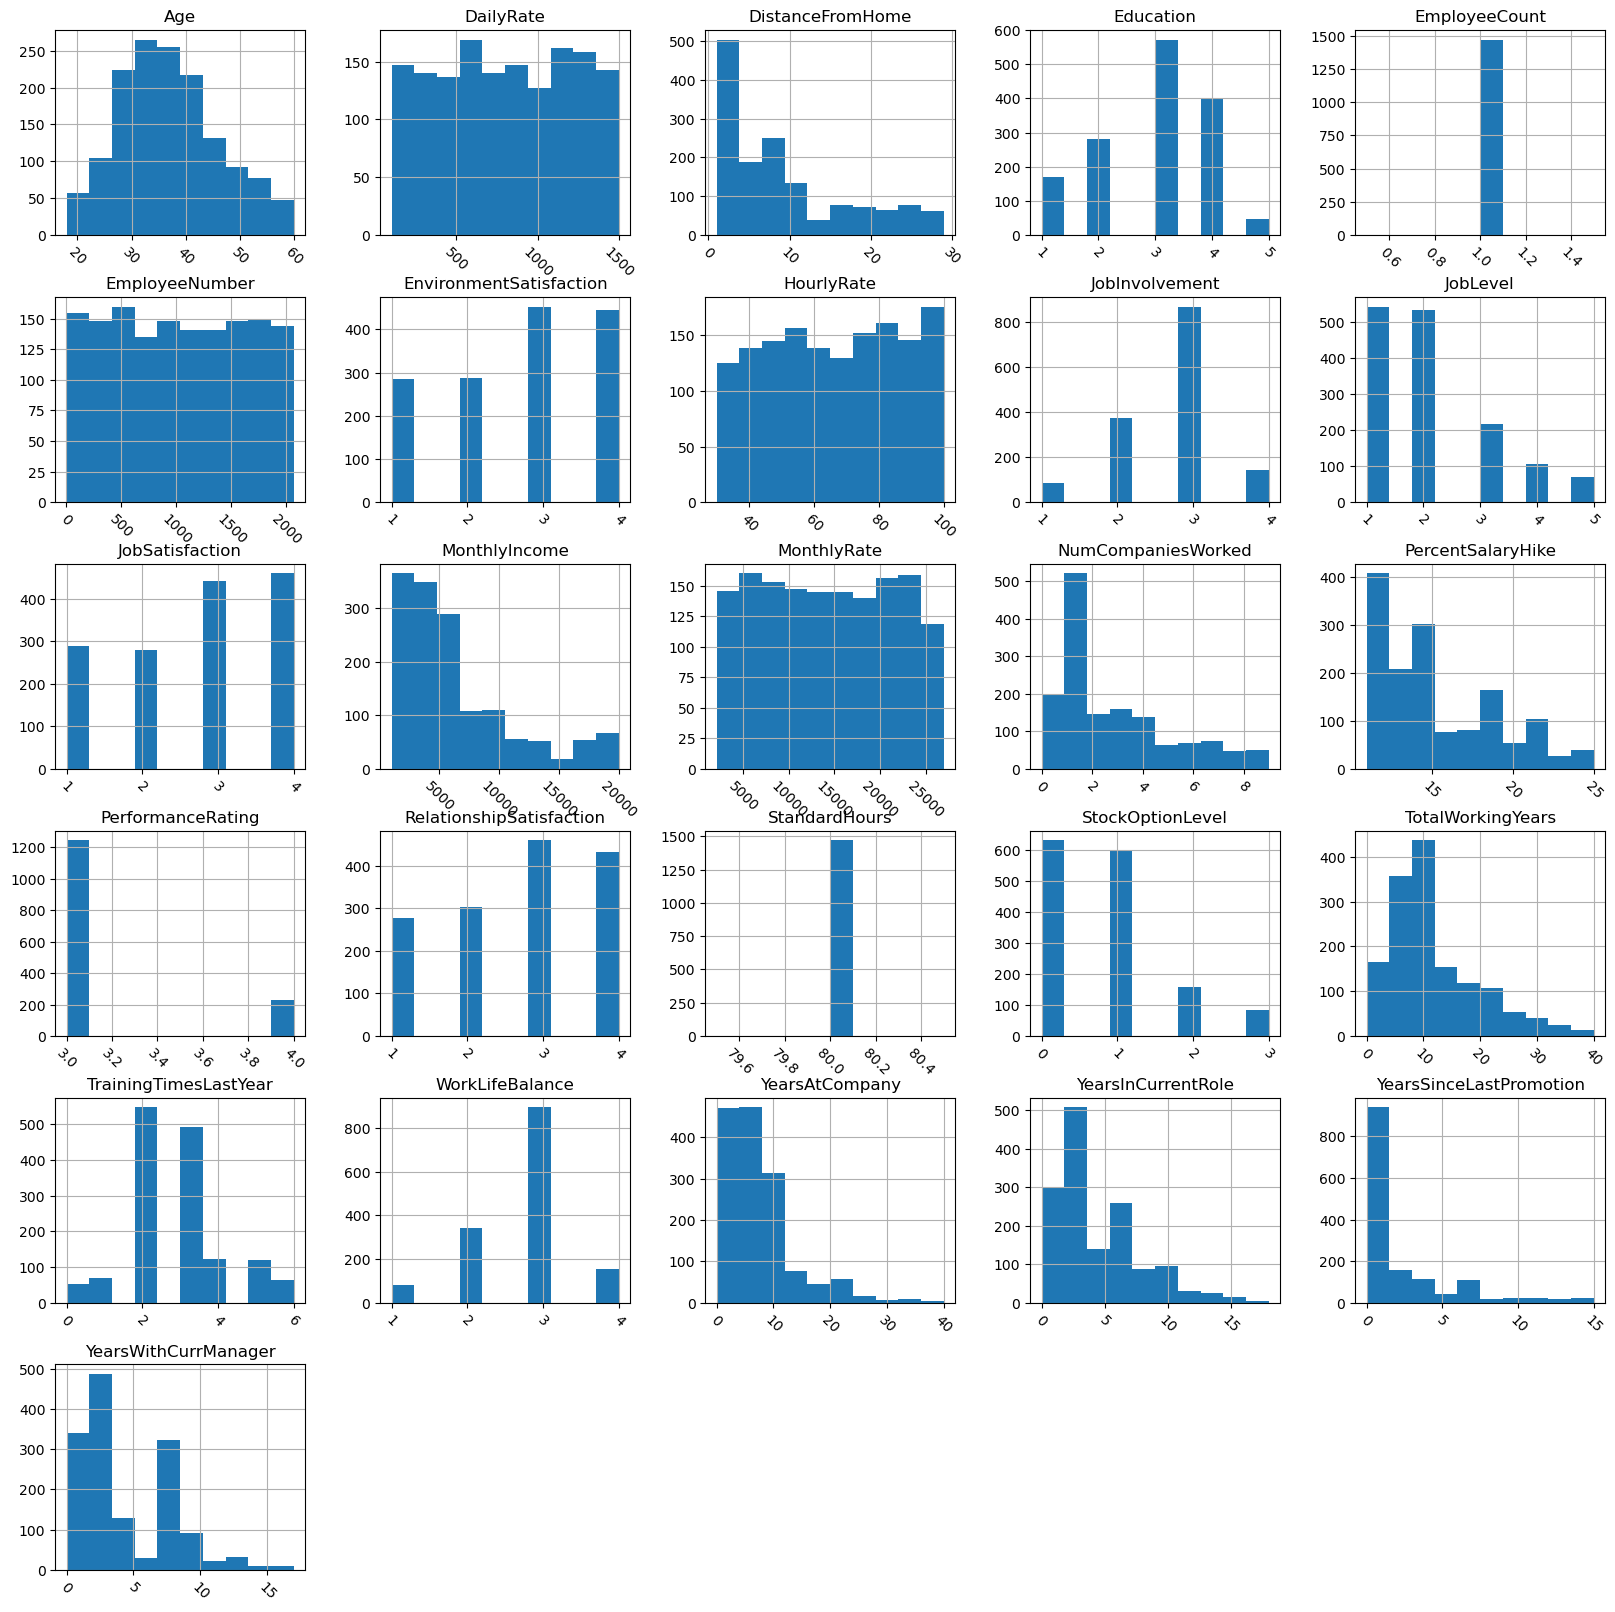

In [9]:
#histogram for numerical columns
df.hist(figsize=(20,20), xrot=-45)
plt.show()

In [10]:
#Drop irrelevant features
df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], inplace=True)

In [11]:
# Check the type of our features. 
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [12]:
# list columns of type numerical and category.
cat_coulmns  = df.select_dtypes(['object']).columns
num_coulmns  = df.select_dtypes(['number']).columns
print(cat_coulmns)
print(num_coulmns)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [13]:
for col in cat_coulmns:
    print('Unique values of ', col, set(df[col]))

Unique values of  Attrition {'No', 'Yes'}
Unique values of  BusinessTravel {'Non-Travel', 'Travel_Rarely', 'Travel_Frequently'}
Unique values of  Department {'Research & Development', 'Human Resources', 'Sales'}
Unique values of  EducationField {'Life Sciences', 'Technical Degree', 'Marketing', 'Medical', 'Human Resources', 'Other'}
Unique values of  Gender {'Female', 'Male'}
Unique values of  JobRole {'Research Director', 'Research Scientist', 'Manufacturing Director', 'Manager', 'Sales Executive', 'Sales Representative', 'Laboratory Technician', 'Human Resources', 'Healthcare Representative'}
Unique values of  MaritalStatus {'Divorced', 'Married', 'Single'}
Unique values of  OverTime {'No', 'Yes'}


## EDA ##

In [15]:
# Display the statistical overview of the employees
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### I. Gender Analysis ###

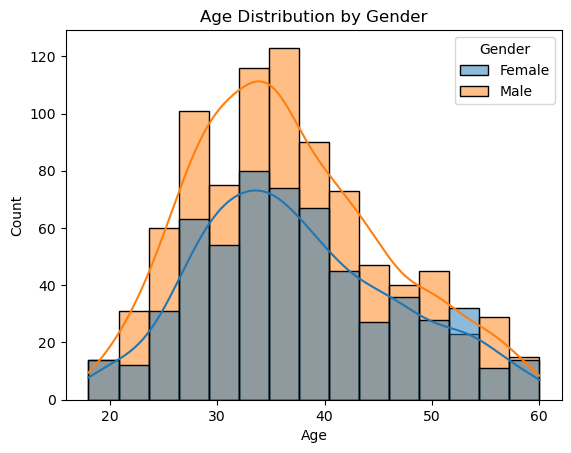

In [17]:
# a) Age Distribution by Gender
sns.histplot(data=df, x="Age", hue="Gender", kde=True, bins=15)
plt.title("Age Distribution by Gender")
plt.show()

We found that median age of employee's in the company is 28 - 42 Yrs. Minimum age is 18 Yrs and Maximum age is 60 Yrs

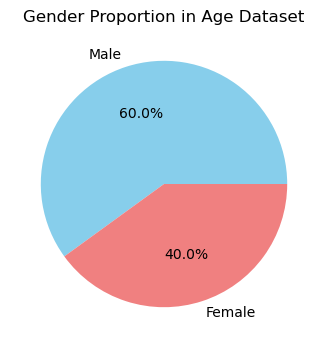

In [19]:
# Count the number of individuals by gender
gender_counts = df['Gender'].value_counts()

# Pie chart
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, colors=['skyblue', 'lightcoral'], autopct='%1.1f%%')
plt.title('Gender Proportion in Age Dataset')
plt.show()


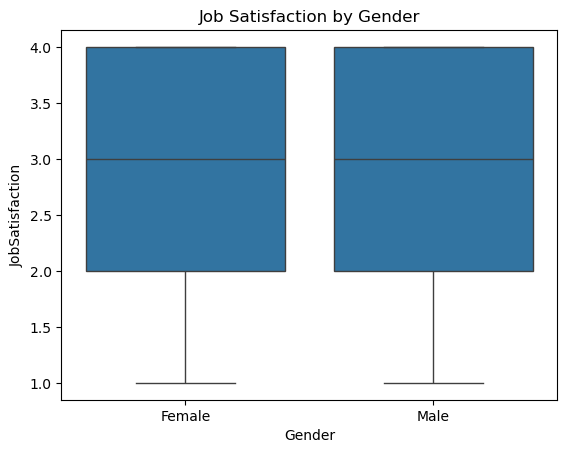

In [20]:
# b) Job Satisfaction Distribution by Gender
sns.boxplot(data=df, x="Gender", y="JobSatisfaction")
plt.title("Job Satisfaction by Gender")
plt.show()

The distribution appears symmetric for both genders, with no visible outliers.

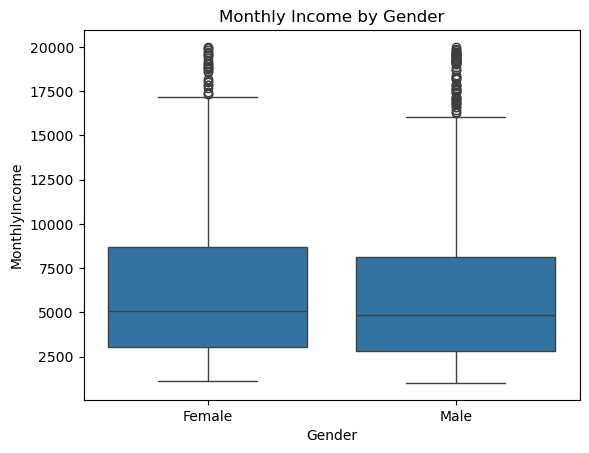

In [22]:
# c) Monthly Income by Gender
sns.boxplot(data=df, x="Gender", y="MonthlyIncome")
plt.title("Monthly Income by Gender")
plt.show()

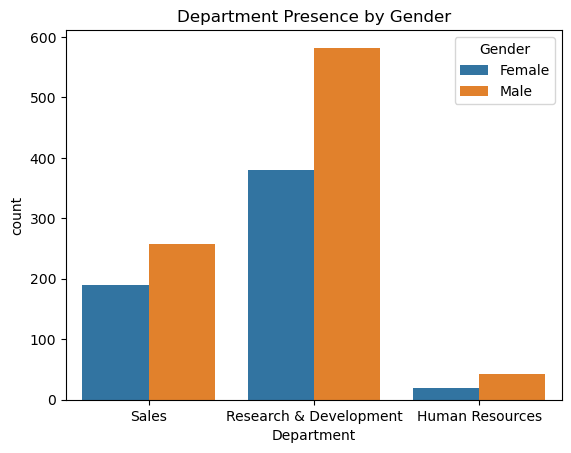

In [23]:
# d) Presence by Department
sns.countplot(data=df, x="Department", hue="Gender")
plt.title("Department Presence by Gender")
plt.show()

### II. Analysis by Generation and Education ###

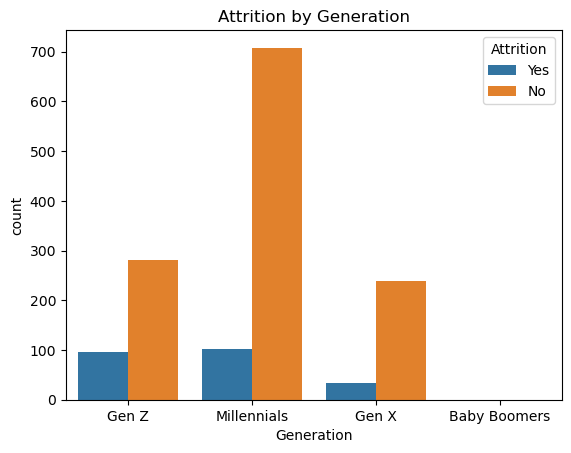

In [25]:
# a) Generational Behavior
bins = [18, 30, 45, 60, 100]
labels = ['Gen Z', 'Millennials', 'Gen X', 'Baby Boomers']
df['Generation'] = pd.cut(df['Age'], bins=bins, labels=labels)

sns.countplot(data=df, x="Generation", hue="Attrition")
plt.title("Attrition by Generation")
plt.show()

In [26]:
# Calculating the percentage of people who stayed and who left by generation
gen_attrition_percentage = df.groupby('Generation')['Attrition'].value_counts(normalize=True).unstack().fillna(0)* 100
gen_attrition_percentage

C:\Users\himan\AppData\Local\Temp\ipykernel_14040\804359588.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gen_attrition_percentage = df.groupby('Generation')['Attrition'].value_counts(normalize=True).unstack().fillna(0)* 100


Attrition,No,Yes
Generation,,
Gen Z,74.603175,25.396825
Millennials,87.299630,12.700370
Gen X,87.545788,12.454212
Baby Boomers,0.000000,0.000000


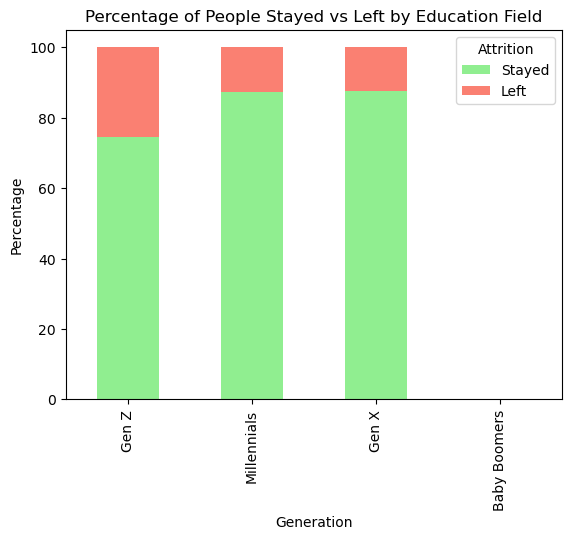

In [27]:
# Renaming columns for clarity
gen_attrition_percentage.columns = ['Stayed', 'Left']

# Plotting the percentage data
gen_attrition_percentage.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'])
plt.title("Percentage of People Stayed vs Left by Education Field")
plt.ylabel("Percentage")
plt.xlabel("Generation")
plt.legend(title="Attrition", labels=["Stayed", "Left"])
plt.show()

Observation: Gen Z are the ones leaving the company the most.
While Millenials are mostly loyal.

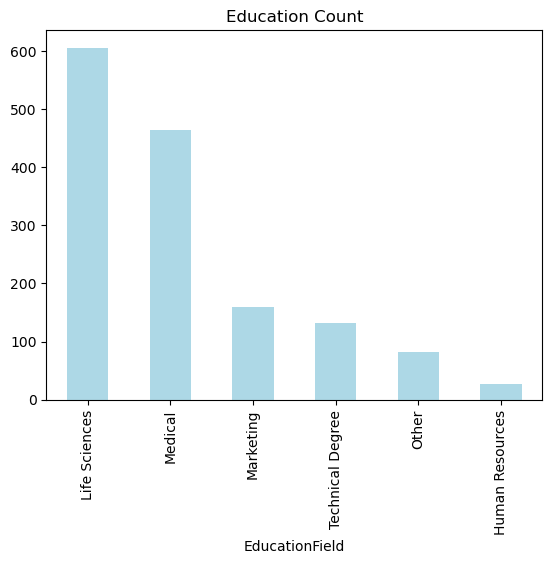

In [29]:
# b) by Education
education_count = df['EducationField'].value_counts()
education_count.plot(kind='bar', color='lightblue')
plt.title("Education Count")
plt.show()

In [30]:
# Calculating the percentage of people who stayed and who left by EducationField
edn_attrition_percentage = df.groupby('EducationField')['Attrition'].value_counts(normalize=True).unstack().fillna(0)* 100
edn_attrition_percentage

Attrition,No,Yes
EducationField,,
Human Resources,74.074074,25.925926
Life Sciences,85.313531,14.686469
Marketing,77.987421,22.012579
Medical,86.422414,13.577586
Other,86.585366,13.414634
Technical Degree,75.757576,24.242424


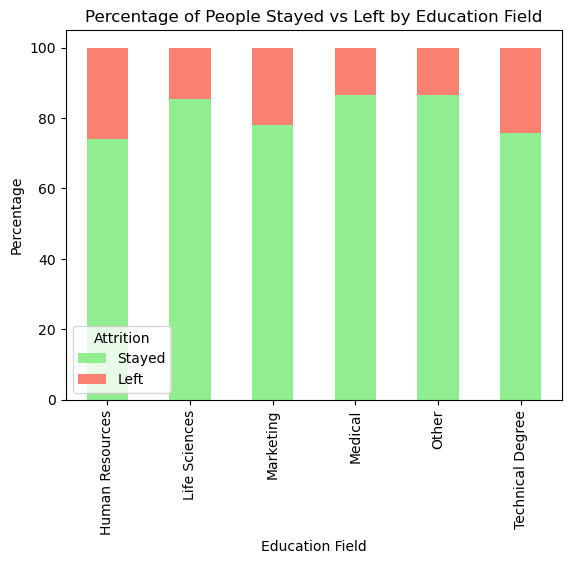

In [31]:
# Renaming columns for clarity
edn_attrition_percentage.columns = ['Stayed', 'Left']

# Plotting the percentage data
edn_attrition_percentage.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'])
plt.title("Percentage of People Stayed vs Left by Education Field")
plt.ylabel("Percentage")
plt.xlabel("Education Field")
plt.legend(title="Attrition", labels=["Stayed", "Left"])
plt.show()

Even if we have highest number of employees from Life Sciences, the percentage of employees leaving is less. Same for Medical.

HR has most number of employees leaving the company, followed by Technical degree and Marketing.

### III. The Impact of Income Towards Attrition ###

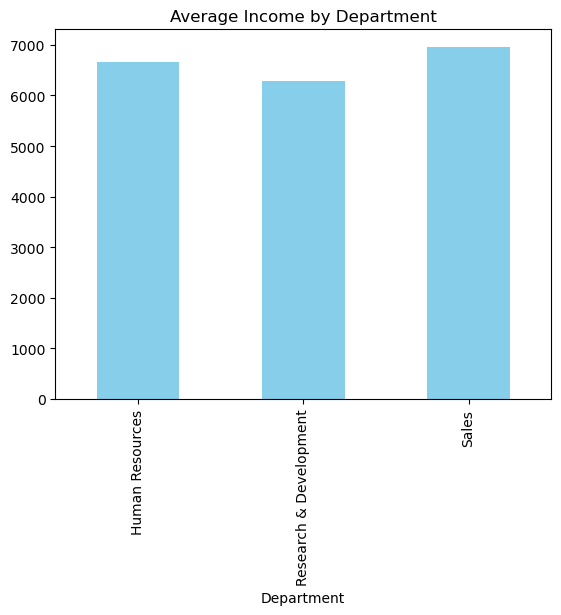

In [34]:
# a) Average Income by Department
avg_income_dept = df.groupby('Department')['MonthlyIncome'].mean()
avg_income_dept.plot(kind='bar', color='skyblue')
plt.title("Average Income by Department")
plt.show()

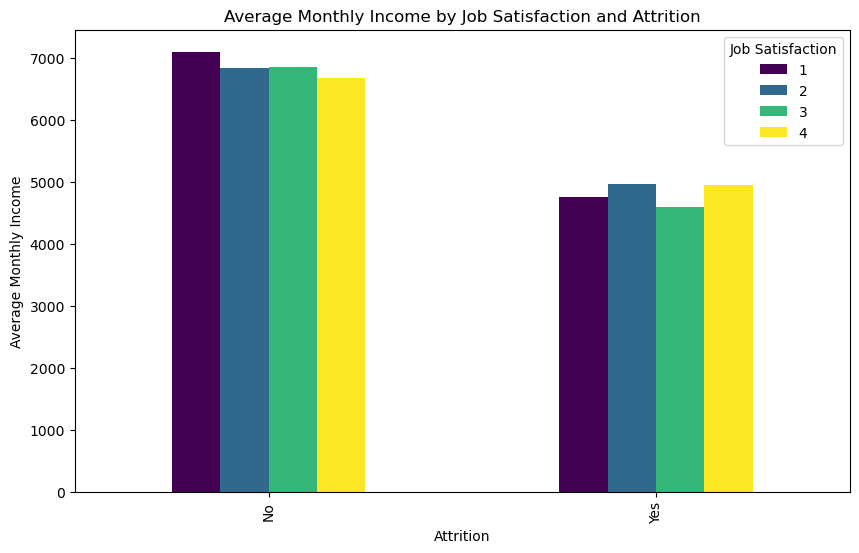

In [35]:
# b) Satisfaction by Income
income_satisfaction = df.groupby(['Attrition', 'JobSatisfaction'])['MonthlyIncome'].mean().unstack()

# Plot grouped bar chart
income_satisfaction.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Average Monthly Income by Job Satisfaction and Attrition")
plt.xlabel("Attrition")
plt.ylabel("Average Monthly Income")
plt.legend(title="Job Satisfaction")
plt.show()


Observations:

a. Attrition 0 (Employees who stayed):
Employees who stayed generally have higher average monthly incomes.
Income slightly decreases as job satisfaction increases, but the difference is minimal.

b. Attrition 1 (Employees who left):
Employees who left have lower average monthly incomes compared to those who stayed.

Insights:
- Higher incomes are generally associated with lower attrition.
- Employees with lower job satisfaction and lower income are more likely to leave

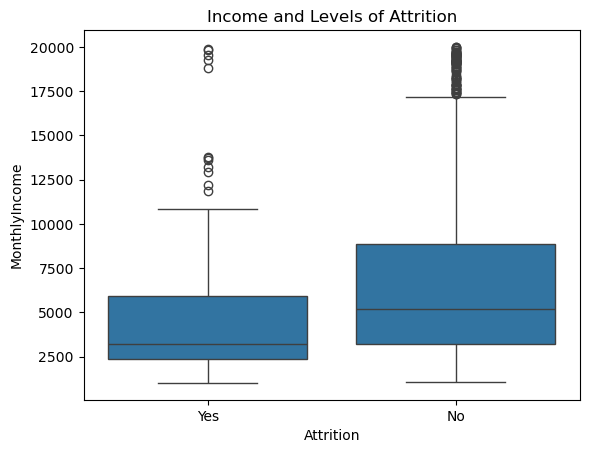

In [37]:
# c) Income and Levels of Attrition
sns.boxplot(data=df, x="Attrition", y="MonthlyIncome")
plt.title("Income and Levels of Attrition")
plt.show()

Insights:
- Employees with lower monthly income appear to have a higher rate of attrition.
- Higher-income employees tend to stay with the company more frequently.
- This visualization suggests a correlation between lower income and higher turnover.

### IV. Working Environment ###

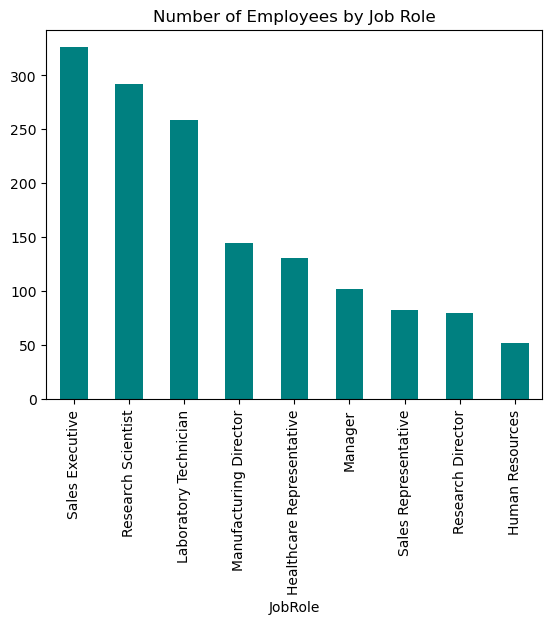

In [40]:
# a) Number of Employees in each Job Role
job_role_counts = df['JobRole'].value_counts()
job_role_counts.plot(kind='bar', color='teal')
plt.title("Number of Employees by Job Role")
plt.show()

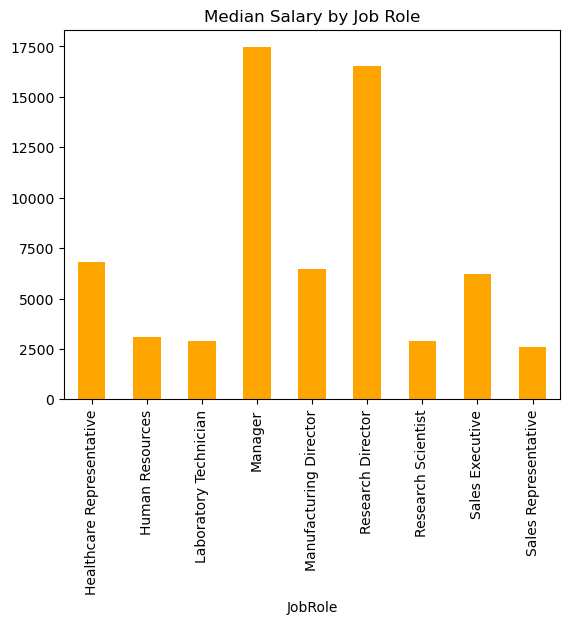

In [41]:
# b) Median Salary by Job Role
median_salary_jobrole = df.groupby('JobRole')['MonthlyIncome'].median()
median_salary_jobrole.plot(kind='bar', color='orange')
plt.title("Median Salary by Job Role")
plt.show()

In [42]:
job_role_attrition1 = df.groupby(['JobRole', 'Attrition']).size().unstack()
job_role_attrition1

Attrition,No,Yes
JobRole,,
Healthcare Representative,122,9
Human Resources,40,12
Laboratory Technician,197,62
Manager,97,5
Manufacturing Director,135,10
Research Director,78,2
Research Scientist,245,47
Sales Executive,269,57
Sales Representative,50,33


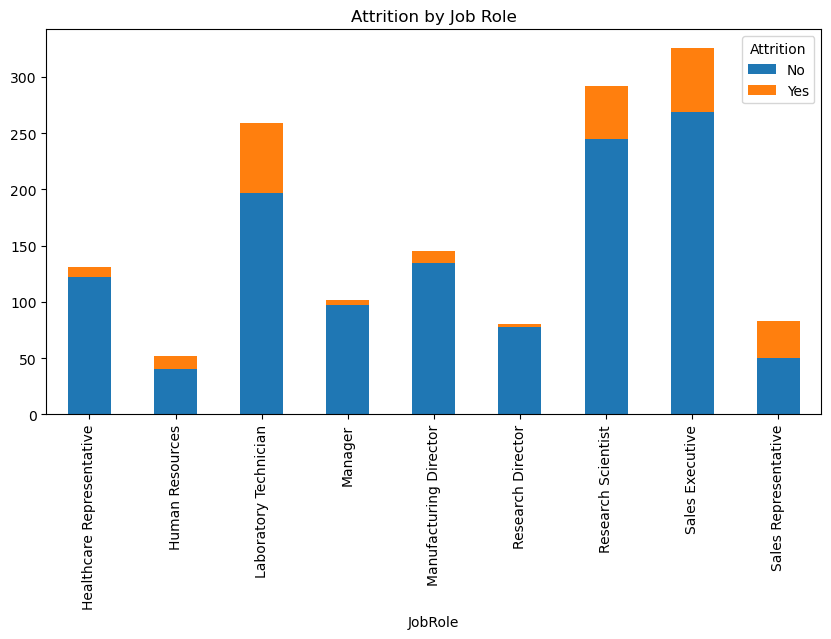

In [43]:
# c) Attrition by Job Role
job_role_attrition = df.groupby(['JobRole', 'Attrition']).size().unstack()
job_role_attrition.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title("Attrition by Job Role")
plt.show()

Insights:
- Sales Executive and Laboratory Technician roles appear to have both high employee counts and notable attrition, suggesting they might be high-turnover positions.
- Leadership roles like Manager and Research Director tend to have lower attrition compared to operational roles.
- Sales Representative shows a high attrition rate despite a lower total number of employees, which could indicate job dissatisfaction or turnover issues specific to that role.

### V. An In-Depth Look into Attrition ###

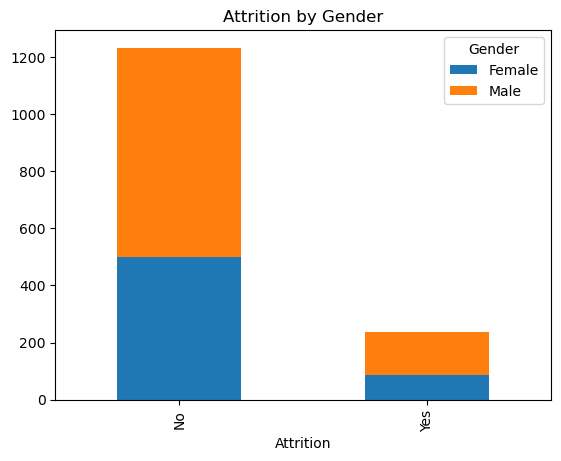

In [46]:
# a) Digging into Attrition
attrition_demographics = df.groupby(['Attrition', 'Gender']).size().unstack()
attrition_demographics.plot(kind='bar', stacked=True)
plt.title("Attrition by Gender")
plt.show()

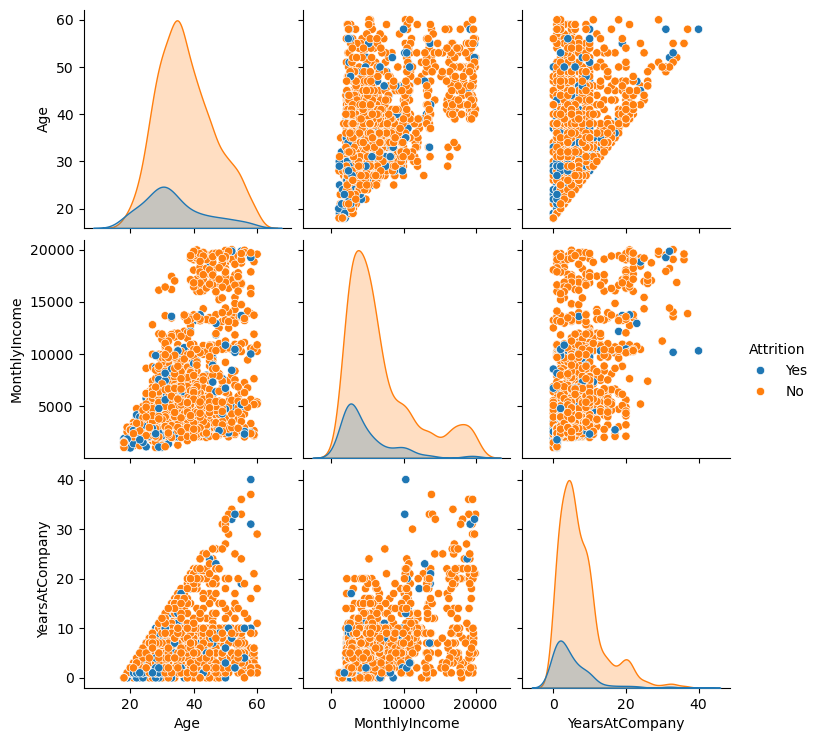

In [47]:
# b) Other Factors that could Influence Attrition
sns.pairplot(df, vars=['Age', 'MonthlyIncome', 'YearsAtCompany'], hue='Attrition')
plt.show()

In [48]:
attr_job1 = (df.groupby(['JobRole', 'Attrition'])
              .size()
              .reset_index(name='amount'))
attr_job1

,JobRole,Attrition,amount
0,Healthcare Representative,No,122
1,Healthcare Representative,Yes,9
2,Human Resources,No,40
3,Human Resources,Yes,12
4,Laboratory Technician,No,197
5,Laboratory Technician,Yes,62
6,Manager,No,97
7,Manager,Yes,5
8,Manufacturing Director,No,135
9,Manufacturing Director,Yes,10


In [49]:
# The Funnel with the Attrition Rates by Job Role

attr_job = (df.groupby(['JobRole', 'Attrition'])
              .size()
              .reset_index(name='amount'))

attr_job['pct'] = (attr_job['amount'] / attr_job.groupby('JobRole')['amount'].transform('sum') * 100).round(2)
attr_job = attr_job.sort_values(by='pct')

# Splitting data for "Yes" and "No" attrition
yes_attr = attr_job[attr_job['Attrition'] == "Yes"].sort_values(by='JobRole')
no_attr = attr_job[attr_job['Attrition'] == "No"].sort_values(by='JobRole')

# Debugging - Check for missing data
print("Unique Values in Attrition Column:", df['Attrition'].unique())
print("Yes Attrition Data:", yes_attr)
print("No Attrition Data:", no_attr)


Unique Values in Attrition Column: ['Yes' 'No']
Yes Attrition Data:                       JobRole Attrition  amount    pct
1   Healthcare Representative       Yes       9   6.87
3             Human Resources       Yes      12  23.08
5       Laboratory Technician       Yes      62  23.94
7                     Manager       Yes       5   4.90
9      Manufacturing Director       Yes      10   6.90
11          Research Director       Yes       2   2.50
13         Research Scientist       Yes      47  16.10
15            Sales Executive       Yes      57  17.48
17       Sales Representative       Yes      33  39.76
No Attrition Data:                       JobRole Attrition  amount    pct
0   Healthcare Representative        No     122  93.13
2             Human Resources        No      40  76.92
4       Laboratory Technician        No     197  76.06
6                     Manager        No      97  95.10
8      Manufacturing Director        No     135  93.10
10          Research Director    

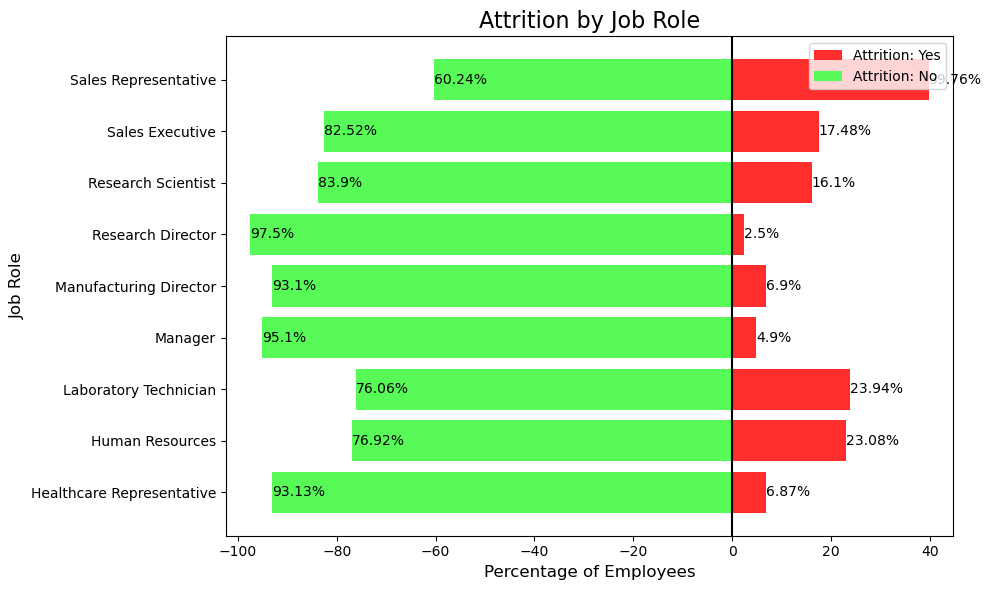

In [50]:
# Define custom color gradients
from matplotlib.colors import LinearSegmentedColormap
# Ensure data alignment
if len(yes_attr) != len(no_attr):
    raise ValueError("Mismatched data for 'Yes' and 'No' categories.")
    
# Defining colors for both sides
colors_yes = ['#F5A9A9', '#FE2E2E', '#B40404']
colors_no = ['#A9F5A9', '#58FA58', '#01DF01']

# Funnel Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Creating a mirrored horizontal bar chart
# Plotting the funnel bars
ax.barh(yes_attr['JobRole'], yes_attr['pct'], color=colors_yes[1], label="Attrition: Yes")
ax.barh(no_attr['JobRole'], -no_attr['pct'], color=colors_no[1], label="Attrition: No")

# Adding labels for percentage on both sides
for i, (y, n) in enumerate(zip(yes_attr['pct'], no_attr['pct'])):
    plt.text(y, i, f'{y}%', va='center', color='black')
    plt.text(-n, i, f'{n}%', va='center', color='black')

# Customizing the plot
ax.set_title("Attrition by Job Role", fontsize=16)
ax.set_xlabel("Percentage of Employees", fontsize=12)
ax.set_ylabel("Job Role", fontsize=12)
ax.axvline(0, color='black', linewidth=1.5)  # Centerline
ax.set_xlim([-max(no_attr['pct'])-5, max(yes_attr['pct'])+5])  # Adjusting x-axis limits
ax.legend(loc="upper right")
plt.tight_layout()
plt.show()

In [54]:
# Group data by OverTime and Attrition
overtime_attrition = df.groupby(['OverTime', 'Attrition']).size().reset_index(name='Count')
overtime_attrition

,OverTime,Attrition,Count
0,No,No,944
1,No,Yes,110
2,Yes,No,289
3,Yes,Yes,127


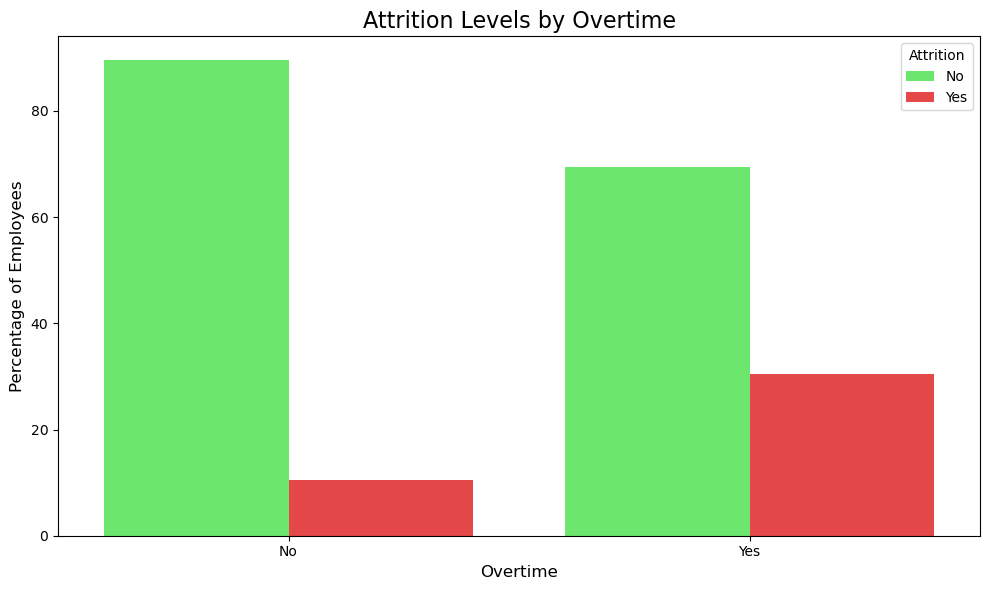

In [55]:
# Calculate percentages
overtime_attrition['Percentage'] = overtime_attrition.groupby('OverTime')['Count'].transform(lambda x: round((x / x.sum()) * 100, 2))

# Visualization: Stacked Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=overtime_attrition, 
    x='OverTime', 
    y='Percentage', 
    hue='Attrition', 
    palette={'Yes': '#FE2E2E', 'No': '#58FA58'}
)
plt.title('Attrition Levels by Overtime', fontsize=16)
plt.xlabel('Overtime', fontsize=12)
plt.ylabel('Percentage of Employees', fontsize=12)
plt.legend(title='Attrition', loc='upper right')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Observations:
1. Overtime and Attrition:

- A significantly higher percentage of employees who work overtime experience attrition (red bar for "Yes" under Overtime is higher than under No Overtime).
- Employees who do not work overtime have a very low attrition rate (small red bar under "No").

2. Employees Retained:

- Among employees who do not work overtime, the majority (represented by the green bar) stay with the organization.
- Even among employees who work overtime, a considerable number still stay, but the attrition rate is noticeably higher compared to those who don’t work overtime.

Key Insights:
- Overtime is a strong factor influencing employee attrition: Employees working overtime are more likely to leave the organization than those who don’t.
- Work-life balance might play a role: The data suggests that employees working excessive hours may feel burnt out, leading to higher turnover.

### Correlation Matrix

In [58]:
# Check the type of our features. 
df.dtypes

Age                            int64
Attrition                     object
BusinessTravel                object
DailyRate                      int64
Department                    object
DistanceFromHome               int64
Education                      int64
EducationField                object
EnvironmentSatisfaction        int64
Gender                        object
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                       object
JobSatisfaction                int64
MaritalStatus                 object
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
OverTime                      object
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StockOptionLevel               int64
TotalWorkingYears              int64
TrainingTimesLastYear          int64
WorkLifeBalance                int64
Y

The correlation matrix function (df.corr()) only works with numerical data.

Categorical columns: Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, OverTime.

In [60]:
# Encode relevant categorical columns
df_encoded = df.copy()

In [61]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in ['MaritalStatus', 'JobRole', 'EducationField', 'Department', 'BusinessTravel','Generation']:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

print("\nLabel Encoded DataFrame:")
print(df_encoded)


Label Encoded DataFrame:
      Age Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41       Yes               2       1102           2                 1   
1      49        No               1        279           1                 8   
2      37       Yes               2       1373           1                 2   
3      33        No               1       1392           1                 3   
4      27        No               2        591           1                 2   
...   ...       ...             ...        ...         ...               ...   
1465   36        No               1        884           1                23   
1466   39        No               2        613           1                 6   
1467   27        No               2        155           1                 4   
1468   49        No               1       1023           2                 2   
1469   34        No               2        628           1                 8   

      Educati

In [62]:

# Binary encoding for columns with two categories
binary_columns = {
    'Attrition': {'Yes': 1, 'No': 0},
    'OverTime': {'Yes': 1, 'No': 0},
    'Gender': {'Male': 1, 'Female': 0},
}
for col, mapping in binary_columns.items():
    df_encoded[col] = df_encoded[col].replace(mapping)

# Select numerical columns (including encoded columns)
numeric_df = df_encoded.select_dtypes(include=['int64', 'int32', 'float64'])

numeric_df.dtypes

C:\Users\himan\AppData\Local\Temp\ipykernel_14040\2308143344.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded[col] = df_encoded[col].replace(mapping)


Age                         int64
Attrition                   int64
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

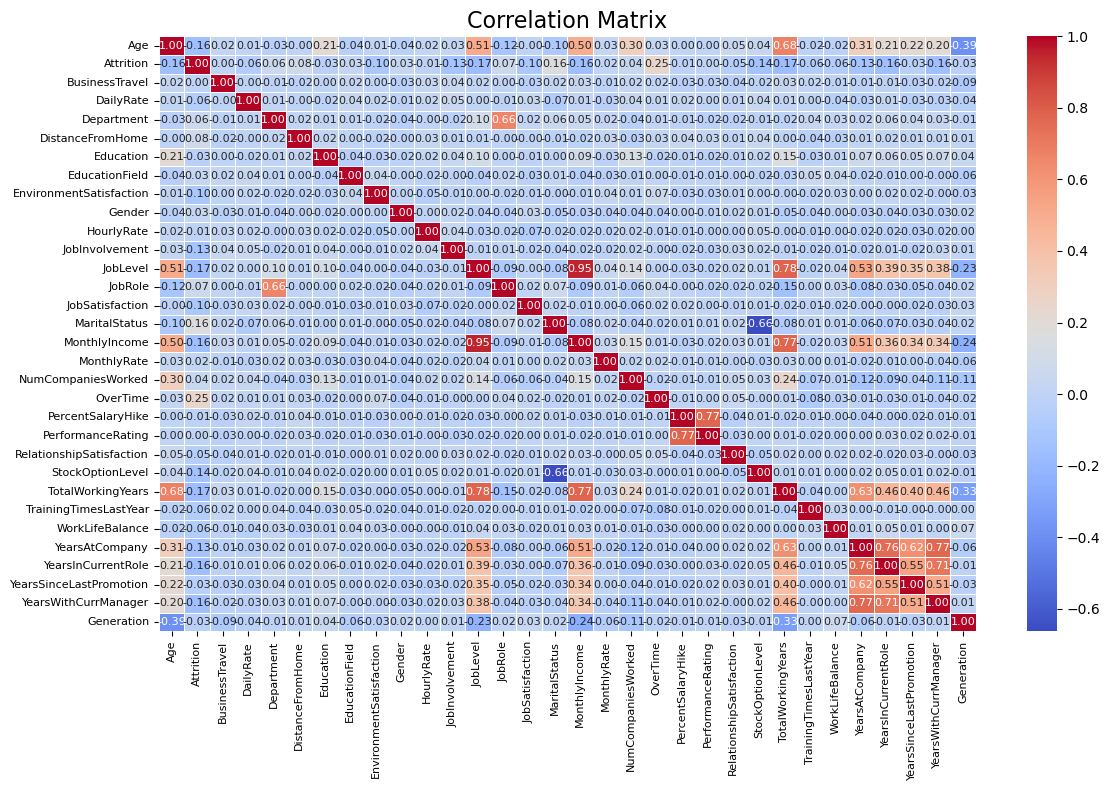

In [63]:
# Compute correlation matrix for numerical columns
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    annot_kws={"size": 8},
    linewidths=0.5
)
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()


Insights 
- JobLevel and MonthlyIncome (0.95): Higher job levels strongly correlate with higher monthly income, indicating a hierarchical salary structure., 
- MonthlyIncome and TotalWorkingYears (0.77): Employees with more experience tend to earn higher salaries. 
- YearsInCurrentRole and YearsWithCurrManager (0.77): Employees who stay longer in their current role often spend more time with their manager.
- MaritalStatus and StockOptionLevel (-0.66):
- Variables like HourlyRate, DailyRate, and MonthlyRate show very weak correlations with other factors, suggesting limited predictive power.

In [65]:
# Drop columns with weak correlations
df = df.drop(columns=['HourlyRate', 'DailyRate', 'MonthlyRate'])

In [66]:
#Income-to-Experience Ratio
#High-income, low-experience employees might be more likely to leave.
df_encoded['Income_Experience_Ratio'] = df_encoded['MonthlyIncome'] / (df_encoded['TotalWorkingYears'] + 1)

In [67]:
#Manager Influence
#Longer tenure with the same manager might impact attrition.
df_encoded['Manager_Tenure_Ratio'] = df_encoded['YearsWithCurrManager'] / (df_encoded['YearsAtCompany'] + 1)

In [68]:
#Job Stability Index
#This helps understand how frequently an employee changes roles.
df_encoded['Job_Stability_Index'] = df_encoded['YearsInCurrentRole'] / (df_encoded['TotalWorkingYears'] + 1)


C:\Users\himan\AppData\Local\Temp\ipykernel_14040\1924772716.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette="Set2")


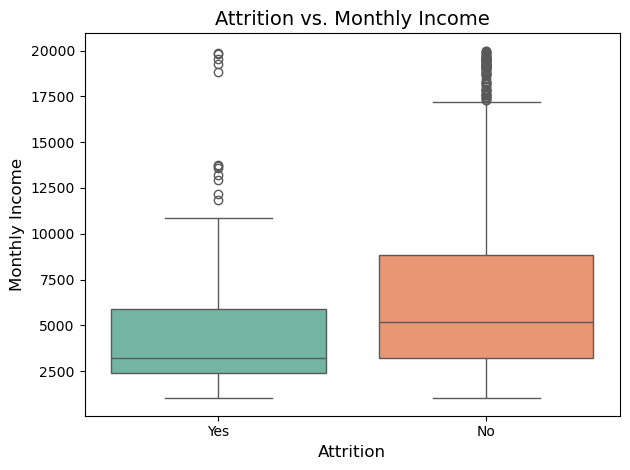

In [69]:
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette="Set2")
plt.title("Attrition vs. Monthly Income", fontsize=14)
plt.xlabel("Attrition", fontsize=12)
plt.ylabel("Monthly Income", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


C:\Users\himan\AppData\Local\Temp\ipykernel_14040\467236464.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='JobSatisfaction', palette="Set3")


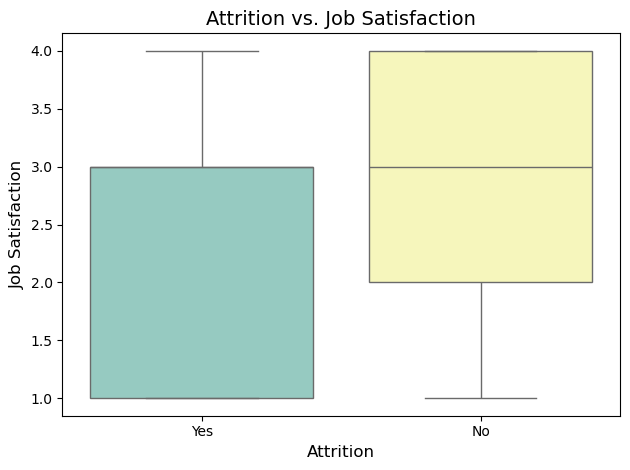

In [70]:
sns.boxplot(data=df, x='Attrition', y='JobSatisfaction', palette="Set3")
plt.title("Attrition vs. Job Satisfaction", fontsize=14)
plt.xlabel("Attrition", fontsize=12)
plt.ylabel("Job Satisfaction", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [71]:
# Relationship between leaving rate and job satisfaction
new_df=df.groupby('EnvironmentSatisfaction').count()
idx=list(new_df.index) #get groups as group 1, group 2, group 3, group 4 
count=list(new_df['Age'].values)

percent_dropout=[] #list contains employees dropout percent
for i in range(len(idx)):
    percent_dropout.append(round((len(df[df['EnvironmentSatisfaction']==idx[i]][df['Attrition']=='Yes'])/count[i])*100,3))

C:\Users\himan\AppData\Local\Temp\ipykernel_14040\4253098483.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  percent_dropout.append(round((len(df[df['EnvironmentSatisfaction']==idx[i]][df['Attrition']=='Yes'])/count[i])*100,3))
C:\Users\himan\AppData\Local\Temp\ipykernel_14040\4253098483.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  percent_dropout.append(round((len(df[df['EnvironmentSatisfaction']==idx[i]][df['Attrition']=='Yes'])/count[i])*100,3))
C:\Users\himan\AppData\Local\Temp\ipykernel_14040\4253098483.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  percent_dropout.append(round((len(df[df['EnvironmentSatisfaction']==idx[i]][df['Attrition']=='Yes'])/count[i])*100,3))
C:\Users\himan\AppData\Local\Temp\ipykernel_14040\4253098483.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  percent_dropout.append(round((len(df[df['EnvironmentSatisfactio

In [72]:
envSat_attrition_df={idx[i]:[count[i],percent_dropout[i]] for i in range(len(idx))}
envSat_attrition_df['Statistical']=['Number of employees','Percentage of leave']
envSat_attrition_df=pd.DataFrame(envSat_attrition_df).set_index('Statistical')
envSat_attrition_df.head()

,1,2,3,4
Statistical,,,,
Number of employees,284.000,287.000,453.000,446.000
Percentage of leave,25.352,14.983,13.687,13.453


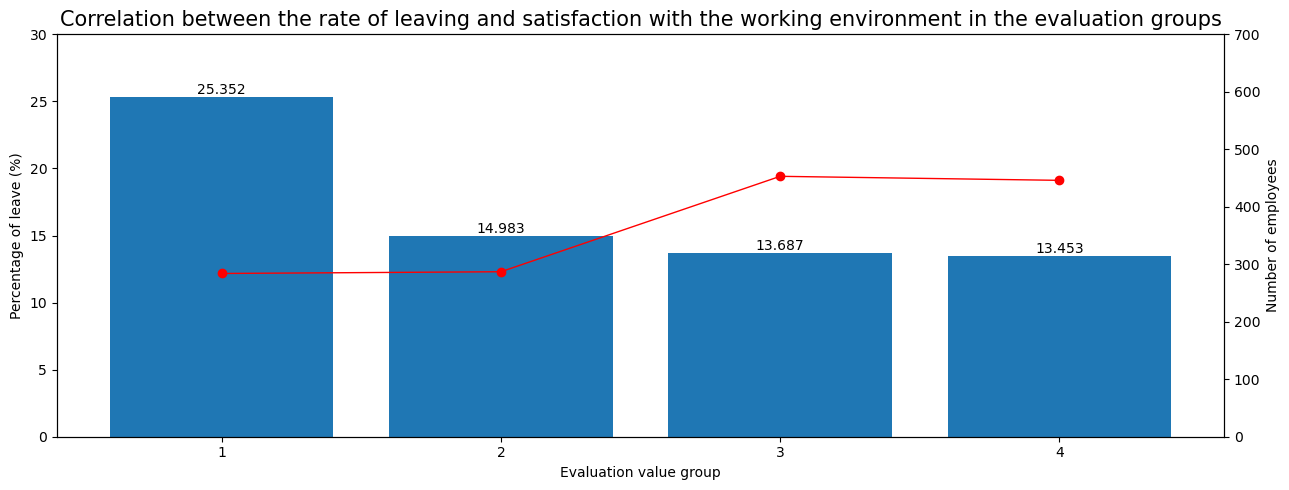

In [73]:
groups=['1','2','3','4']
fig,ax1=plt.subplots(figsize=(13,5))# bar chart
bars=ax1.bar(groups,envSat_attrition_df.loc[['Percentage of leave']].values[0])
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.3f}', ha='center', va='bottom')
ax2=ax1.twinx()
ax2.plot(groups,envSat_attrition_df.loc[['Number of employees']].values[0],lw=1,marker='o',color='r')
ax1.set(xlabel='Evaluation value group', ylabel='Percentage of leave (%)')
ax2.set(ylabel='Number of employees')
ax1.set_ylim(0,30)
ax2.set_ylim(0,700)
ax1.set_title(f'Correlation between the rate of leaving and satisfaction with the working environment in the evaluation groups', size=15)
fig.tight_layout()
plt.show();

- The number of employees who are satisfied with the working environment is also very high, as is the job satisfaction.
- The average rate of leaving is higher in the low-rated groups than in the high-value groups. This is also very consistent with reality.
- From here, it shows that besides salary, the working environment factor is also an important factor that determines whether employees really stick around for a long time or not.

### ML Model

Problem posed: Predict whether employees are at risk of leaving the company they are working for?

In [77]:
df_copy=df_encoded.copy()

In [78]:
# Check to see if there are any missing values in our data set
df_copy.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Generation                  0
Income_Experience_Ratio     0
Manager_Te

In [79]:
df_copy.dtypes


Age                           int64
Attrition                     int64
BusinessTravel                int32
DailyRate                     int64
Department                    int32
DistanceFromHome              int64
Education                     int64
EducationField                int32
EnvironmentSatisfaction       int64
Gender                        int64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                       int32
JobSatisfaction               int64
MaritalStatus                 int32
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                      int64
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany              

In [80]:
num_coulmns  = df.select_dtypes(['int32', 'int64', 'float64']).columns
print(num_coulmns)

Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_copy[num_coulmns] = scaler.fit_transform(df_copy[num_coulmns])

In [82]:
# Define target variable and features
X = df_copy.drop(columns=['Attrition'])  # Features
y = df_copy['Attrition']  # Target

In [83]:
# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Normalize/Scale Features 
ML models perform better when numerical features are scaled to a similar range.

In [85]:
# Preprocessing: Scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_coulmns)  # Standardize numerical features
    ],
    remainder='passthrough'  # Keep categorical features unchanged
)

In [86]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train & Evaluate Models
for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Train model
    pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]  # Probability scores for ROC-AUC
    
    # Evaluation Metrics
    print(f"\n🔹 Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
    print("Classification Report:\n", classification_report(y_test, y_pred))

C:\Users\himan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔹 Model: Logistic Regression
Accuracy: 0.8639455782312925
ROC-AUC Score: 0.7915410457403739
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       247
           1       0.63      0.36      0.46        47

    accuracy                           0.86       294
   macro avg       0.76      0.66      0.69       294
weighted avg       0.85      0.86      0.85       294


🔹 Model: Random Forest
Accuracy: 0.8333333333333334
ROC-AUC Score: 0.7454130416056508
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.43      0.13      0.20        47

    accuracy                           0.83       294
   macro avg       0.64      0.55      0.55       294
weighted avg       0.79      0.83      0.79       294


🔹 Model: XGBoost
Accuracy: 0.8571428571428571
ROC-AUC Score: 0.7696614695494876
Classification Report:
              

C:\Users\himan\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:22:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy Score is quite high, but is it good enough for evaluating the effectiveness of the model?

Issues Identified
1. Severe Class Imbalance

- Class 0 (Non-Attrition): 247 samples
- Class 1 (Attrition): 47 samples
- The model struggles to predict attrition cases because the dataset is highly imbalanced.

2. Poor Recall for Class 1 (Attrition)

- Logistic Regression: 40% recall
- XGBoost: 28% recall
- Random Forest: 13% recall
- Means the models fail to detect many employees who actually leave.

3. Random Forest Performed the Worst

- It barely predicts attrition cases correctly.
- Overfits to majority class (class 0).

### Handle Class Imbalance

In [89]:
grouped_counts = df.groupby('Attrition').size().reset_index(name='Counts')
grouped_counts

,Attrition,Counts
0,No,1233
1,Yes,237


In [171]:
turnover_rate = df.Attrition.value_counts() / len(df)
turnover_rate

Attrition
No     0.838776
Yes    0.161224
Name: count, dtype: float64

Data exhibits class imbalance, where 83.88% of employees did not leave (class No), and only 16.12% of employees left (class Yes). This imbalance can affect the performance of machine learning models, as most models tend to favor the majority class.

In [90]:
# Store counts in variables
class_0 = grouped_counts.loc[grouped_counts['Attrition'] == 'No', 'Counts'].values[0]
class_1 = grouped_counts.loc[grouped_counts['Attrition'] == 'Yes', 'Counts'].values[0]

In [91]:
#Method 1: Class Weighting
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=class_0 / class_1, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train & Evaluate Models
for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Train model
    pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]  # Probability scores for ROC-AUC
    
    # Evaluation Metrics
    print(f"\n🔹 Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
    print("Classification Report:\n", classification_report(y_test, y_pred))

C:\Users\himan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔹 Model: Logistic Regression
Accuracy: 0.7380952380952381
ROC-AUC Score: 0.8175553449909553
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.74      0.83       247
           1       0.35      0.74      0.48        47

    accuracy                           0.74       294
   macro avg       0.64      0.74      0.65       294
weighted avg       0.84      0.74      0.77       294


🔹 Model: Random Forest
Accuracy: 0.8333333333333334
ROC-AUC Score: 0.7722456714617969
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.40      0.09      0.14        47

    accuracy                           0.83       294
   macro avg       0.62      0.53      0.52       294
weighted avg       0.78      0.83      0.79       294


🔹 Model: XGBoost
Accuracy: 0.8435374149659864
ROC-AUC Score: 0.7705228701869239
Classification Report:
              

C:\Users\himan\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:22:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After applying class_weight='balanced':

1. Logistic Regression
Overall Observation:
Much better at identifying attrition cases (high recall).
However, precision is low, meaning many false positives (predicting attrition when it doesn’t happen).

2. Random Forest
Overall Observation:
Still fails to identify attrition cases (very low recall).
Shows strong bias towards class 0 (non-attrition).

3. XGBoost
Overall Observation:
A minor improvement, but still not good at detecting attrition cases.
Precision-recall tradeoff remains an issue.

### SMOTE for Oversampling

In [94]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42, stratify=y_train_resampled)


In [96]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train & Evaluate Models
for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Train model
    pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]  # Probability scores for ROC-AUC
    
    # Evaluation Metrics
    print(f"\n🔹 Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
    print("Classification Report:\n", classification_report(y_test, y_pred))

C:\Users\himan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔹 Model: Logistic Regression
Accuracy: 0.8
ROC-AUC Score: 0.8613033892221709
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80       198
           1       0.79      0.82      0.80       197

    accuracy                           0.80       395
   macro avg       0.80      0.80      0.80       395
weighted avg       0.80      0.80      0.80       395


🔹 Model: Random Forest
Accuracy: 0.9164556962025316
ROC-AUC Score: 0.9769907193765062
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       198
           1       0.96      0.87      0.91       197

    accuracy                           0.92       395
   macro avg       0.92      0.92      0.92       395
weighted avg       0.92      0.92      0.92       395


🔹 Model: XGBoost
Accuracy: 0.9113924050632911
ROC-AUC Score: 0.9662616007793673
Classification Report:
               precision    r

C:\Users\himan\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:22:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After applying SMOTE, all three models—Logistic Regression, Random Forest, and XGBoost—show improvements in recall for the minority class (1), indicating better handling of class imbalance.
XGBoost is currently the best-balanced model. 

## Interpreting the Data

- Employees with lower job satisfaction and lower income are more likely to leave.
- Employees generally left when they are underworked. This was a surpirse, employees who don't have overtime are most likely to leave the organization. This could be that employees would like to have a higher amount of income or employees could feel that they are underused.
- Overtime is a strong factor influencing employee attrition: Employees generally left when they are overworked.
- Employees with low to medium salaries are the bulk of employee turnover. As expected, Income is a huge factor as why employees leave the organization in search for a better salary.
- Working environment factor is also an important factor that determines whether employees really stick around for a long time or not.
- Gen Z are the ones leaving the company the most. While Millenials are mostly loyal.
- Employee satisfaction, yearsAtCompany, and evaluation were the three biggest factors in determining turnover.

## Solution

1. We can rank employees by their probability of leaving, then allocate a limited incentive budget to the highest probability instances.
OR, we can allocate our incentive budget to the instances with the highest expected loss, for which we'll need the probability of turnover.

2. Develop learning programs for managers. 

3. Develop a real-time dashboard to track attrition risks and performance metrics.

4. Improve work-life balance policies (flexible working hours, remote work options).

5. Offer performance-based bonuses & incentives to retain high performers.

6. Regular employee feedback surveys to address concerns before resignation.

7. Increase team-building activities and mental health support programs.